In [4]:
import requests
from datetime import datetime
import json
import pandas as pd

# Test the different endpoint from the API

In [5]:
backendUrl="https://exj7xp8iog.execute-api.eu-west-3.amazonaws.com/laurent"


### Create a consumption record

In [30]:
from random import randrange
def get_consumption(device,ts):
    return {
        "consumptionDate":ts,
        "consumption": [randrange(10,3000) for _ in range(5)],
        "deviceNumber": device,
        "details": [randrange(100,300) for _ in range(5)]
        }

ts=datetime.now().isoformat()
for device in range(0,5):
    data=json.dumps(get_consumption(device,ts))
    url=f"{backendUrl}/create/consumption"
    rq=requests.post(url,data)
    print(device,rq.status_code)

0 200
1 200
2 200
3 200
4 200


In [7]:
data

'{"consumptionDate": "2023-01-07T16:10:57.619879", "consumption": [2180, 178, 63, 1129, 1035], "deviceNumber": 1, "details": [256, 267, 205, 241, 244]}'

In [37]:
rq=requests.post("http://localhost:8000/create/Consumption","[]")
rq

<Response [501]>

### Get the consumption data from backend

In [76]:
startDate="2023-01-08T18"
url=f"{backendUrl}/getAll/consumption?startDate={startDate}"
message=requests.get(url).json()
len(message["data"]),max([d["consumptionDate"] for d in message["data"]])

(2, '2023-01-08T18:24:52.107Z')

In [77]:
sorted([(d["consumptionDate"],d["deviceNumber"]) for d in message["data"]])

[('2023-01-08T18:24:52.107Z', 1), ('2023-01-08T18:24:52.107Z', 1)]

In [75]:
data=pd.DataFrame(message["data"])
data.loc[:,"kwh"]=[ sum(c) for c in data.consumption]

data.sort_values("consumptionDate").tail()

,consumptionDate,deviceType,deviceNumber,updatedAt,createdAt,consumption,SK,details,PK,id,kwh
29,2023-01-08T18:18:28.111546+01:00,unknown,4,2023-01-08T17:18:29.394Z,2023-01-08T17:18:29.394Z,"[2.603612, 0, 0, 0, 0]",CONSUMPTION#unknown,"[10, 0, 0, 0, 0]",CONSUMPTION#a983835b-c995-4788-abe5-52e2d0c47c37,a983835b-c995-4788-abe5-52e2d0c47c37,2.603612
12,2023-01-08T18:18:51.602035+01:00,unknown,3,2023-01-08T17:18:52.820Z,2023-01-08T17:18:52.820Z,"[2.723669, 0, 0, 0, 0]",CONSUMPTION#unknown,"[10, 0, 0, 0, 0]",CONSUMPTION#292ea21e-3c11-41b7-8707-b358c286ae26,292ea21e-3c11-41b7-8707-b358c286ae26,2.723669
5,2023-01-08T18:18:51.602035+01:00,unknown,4,2023-01-08T17:18:52.930Z,2023-01-08T17:18:52.930Z,"[2.615454, 0, 0, 0, 0]",CONSUMPTION#unknown,"[10, 0, 0, 0, 0]",CONSUMPTION#5f4d4158-51c7-4a9c-9d92-4a5c29caa186,5f4d4158-51c7-4a9c-9d92-4a5c29caa186,2.615454
4,2023-01-08T18:19:15.164334+01:00,unknown,4,2023-01-08T17:19:24.151Z,2023-01-08T17:19:24.151Z,"[2.599408, 0, 0, 0, 0]",CONSUMPTION#unknown,"[10, 0, 0, 0, 0]",CONSUMPTION#75499c24-a999-4327-b021-516097da397f,75499c24-a999-4327-b021-516097da397f,2.599408
13,2023-01-08T18:23:33.911793+01:00,unknown,4,2023-01-08T17:23:34.937Z,2023-01-08T17:23:34.937Z,"[0, 18.80601, 0, 0, 0]",CONSUMPTION#unknown,"[0, 59, 0, 0, 0]",CONSUMPTION#08d39efa-b650-4da1-b527-1fe966a028fd,08d39efa-b650-4da1-b527-1fe966a028fd,18.806010


<AxesSubplot:xlabel='consumptionDate'>

) missing from current font.vs/diy/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


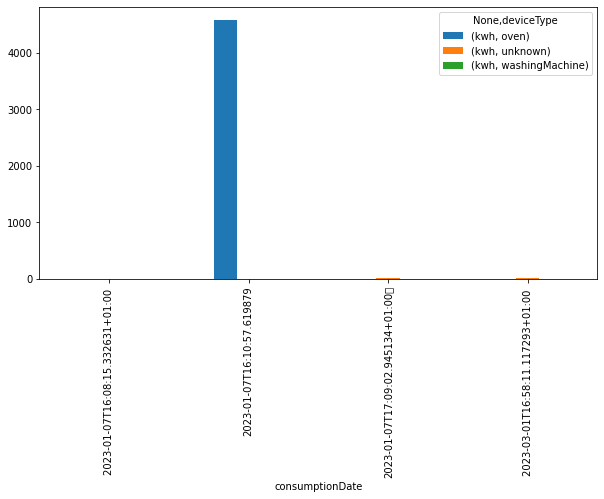

In [14]:
data.groupby(["consumptionDate","deviceType"]).agg(kwh=("kwh","sum")).unstack().fillna(0).plot.bar(figsize=(10,5))

In [10]:
data.groupby(["consumptionDate","deviceNumber"]).agg(kwh=("kwh","sum"),ct=("deviceNumber","nunique")).unstack().fillna(0)

kwh                                  \
deviceNumber                              0            1         2        3   
consumptionDate                                                               
2023-01-07T16:08:15.332631+01:00   0.000000     1.560122  0.000000  0.00000   
2023-01-07T16:10:57.619879         0.000000  4585.000000  0.000000  0.00000   
2023-03-01T16:58:11.117293+01:00   1.560122     1.663221  1.802807  1.97167   

                                              ct                      
deviceNumber                              4    0    1    2    3    4  
consumptionDate                                                       
2023-01-07T16:08:15.332631+01:00   0.000000  0.0  1.0  0.0  0.0  0.0  
2023-01-07T16:10:57.619879         0.000000  0.0  1.0  0.0  0.0  0.0  
2023-03-01T16:58:11.117293+01:00   3.269307  1.0  1.0  1.0  1.0  1.0

In [117]:
data.tail()

,consumptionDate,deviceType,deviceNumber,updatedAt,createdAt,consumption,SK,details,PK,id,kwh
15,2023-01-01T16:58:11.117293+01:00,oven,1,2023-01-01T15:59:15.812Z,2023-01-01T15:59:15.812Z,"[1199, 702, 546, 2355, 68]",CONSUMPTION#oven,"[217, 279, 290, 232, 236]",CONSUMPTION#619df004-b13f-495b-b6fb-ab5e3ffa46d9,619df004-b13f-495b-b6fb-ab5e3ffa46d9,4870.000000
16,2023-01-01T16:42:30.245982+01:00\r,unknown,0,2023-01-01T15:42:31.127Z,2023-01-01T15:42:31.127Z,"[0, 7.36017, 1.497986, 0.159197, 0]",CONSUMPTION#unknown,"[0, 13, 2, 0, 0]",CONSUMPTION#fc1420b5-0568-47a8-b8ad-42824c20a920,fc1420b5-0568-47a8-b8ad-42824c20a920,9.017353
17,2023-01-01T17:36:27.042580+01:00\r,unknown,0,2023-01-01T16:36:28.282Z,2023-01-01T16:36:28.282Z,"[0, 0, 3.220851, 0.152015, 0]",CONSUMPTION#unknown,"[0, 0, 5, 0, 0]",CONSUMPTION#70796b4f-a5d6-451f-8843-88266ff6702a,70796b4f-a5d6-451f-8843-88266ff6702a,3.372866
18,2023-01-01T16:58:11.117293+01:00,unknown,4,2023-01-01T16:48:36.968Z,2023-01-01T16:48:36.968Z,"[1.194518, 2.074789, 0, 0, 0]",CONSUMPTION#unknown,"[7, 5, 0, 0, 0]",CONSUMPTION#81c6f1cf-baf2-41c9-876d-08667960a055,81c6f1cf-baf2-41c9-876d-08667960a055,3.269307
19,2023-01-01T17:36:27.042580+01:00\r,unknown,4,2023-01-01T16:36:28.777Z,2023-01-01T16:36:28.777Z,"[0.376513, 1.428964, 0, 0, 0]",CONSUMPTION#unknown,"[1, 4, 0, 0, 0]",CONSUMPTION#64924d10-e899-4723-b690-e9b51a3fb9f4,64924d10-e899-4723-b690-e9b51a3fb9f4,1.805477


In [2]:
import serial
from serial.tools import list_ports

In [41]:
data=[
{"consumptionDate":"2023-03-01T16:58:11.117293+01:00 ","deviceNumber":0,"consumption":[0.984873,0.363306,0,0,0.211943],"details":[11,0,0,0,0]},
{"consumptionDate":"2023-03-01T16:58:11.117293+01:00 ","deviceNumber":1,"consumption":[0.850754,0.457867,0,0.3546,0],"details":[11,0,0,0,0]},
{"consumptionDate":"2023-03-01T16:58:11.117293+01:00 ","deviceNumber":2,"consumption":[0.817416,0.45091,0,0.534481,0],"details":[11,0,0,0,0]},
{"consumptionDate":"2023-03-01T16:58:11.117293+01:00 ","deviceNumber":3,"consumption":[0.79601,0.462096,0,0.713564,0],"details":[11,0,0,0,0]},
{"consumptionDate":"2023-03-01T16:58:11.117293+01:00 ","deviceNumber":4,"consumption":[1.194518,2.074789,0,0,0],"details":[7,5,0,0,0]}
]
[len(json.dumps(d)) for d in data]

[157, 155, 156, 156, 149]

In [5]:
for l in data:
    url=f"{backendUrl}/create/consumption"
    rq=requests.post(url,json.dumps(l))
    print(rq.status_code)


200
200
200
200
200


In [42]:
len("2023-03-01T16:58:11.117293+01:00")

32

In [3]:
for p in list_ports.grep(".*serial.*"):
    print(p)

/dev/cu.usbserial-110 - USB2.0-Ser!


In [ ]:
with serial.Serial('/dev/cu.usbserial-110', baudrate=115200, timeout=5) as ser:
    print(ser.name)
    ser.write((datetime.now().isoformat()+"\n").encode("utf-8"))
    ser.flush()
    for _ in range(5):
        print(ser.readline())

SerialException: [Errno 2] could not open port /dev/cu.usbserial-110: [Errno 2] No such file or directory: '/dev/cu.usbserial-110'

In [ ]:
datetime.now().isoformat()+"\n"

'2023-01-01T10:51:28.136502\n'

In [ ]:
help(serial.Serial)

Help on class Serial in module serial.serialposix:

class Serial(serial.serialutil.SerialBase, PlatformSpecific)
 |  Serial(port=None, baudrate=9600, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, write_timeout=None, dsrdtr=False, inter_byte_timeout=None, exclusive=None, **kwargs)
 |  
 |  Serial port class POSIX implementation. Serial port configuration is
 |  done with termios and fcntl. Runs on Linux and many other Un*x like
 |  systems.
 |  
 |  Method resolution order:
 |      Serial
 |      serial.serialutil.SerialBase
 |      io.RawIOBase
 |      _io._RawIOBase
 |      io.IOBase
 |      _io._IOBase
 |      PlatformSpecific
 |      PlatformSpecificBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  cancel_read(self)
 |  
 |  cancel_write(self)
 |  
 |  close(self)
 |      Close port
 |  
 |  fileno(self)
 |      For easier use of the serial port instance with select.
 |      WARNING: this function is not portable to different platf